# Setup

Settings:

In [1]:
threads = 8

updpar = dict()
updpar['T'] = 5
updpar['cppthreads'] = threads
updpar['do_print'] = True

# numba
from consav import runtools
runtools.write_numba_config(disable=0,threads=threads)

Imports and magics:

In [2]:
%matplotlib inline

# reload module each time cell is run
%load_ext autoreload
%autoreload 2

# load the BufferStockModel module
from DurableConsumptionModel import DurableConsumptionModelClass

# Compare NEGM in Python and C++

## C++

In [3]:
model_cpp = DurableConsumptionModelClass(solmethod='negm_cpp',compiler='vs',**updpar)
model_cpp.solve()
model_cpp.simulate()
model_cpp.checksum()

 t = 4 solved in 1.6 secs
  w computed in 0.3 secs
  solved keeper problem in 0.2 secs
  solved adjuster problem in 0.0 secs
 t = 3 solved in 0.5 secs
  w computed in 0.3 secs
  solved keeper problem in 0.2 secs
  solved adjuster problem in 0.0 secs
 t = 2 solved in 0.5 secs
  w computed in 0.3 secs
  solved keeper problem in 0.2 secs
  solved adjuster problem in 0.0 secs
 t = 1 solved in 0.5 secs
  w computed in 0.3 secs
  solved keeper problem in 0.2 secs
  solved adjuster problem in 0.0 secs
 t = 0 solved in 0.5 secs
model simulated in 2.4 secs
euler errors calculated in 0.0 secs
utility calculated in 0.0 secs

checksum, inv_w: 0.57343249
checksum, q: 2.40843128
checksum, c_keep: 1.63515738
checksum, d_adj: 1.10605689
checksum, c_adj: 1.64459279
checksum, inv_v_keep: 0.33824474
checksum, inv_marg_u_keep: 3.51547572
checksum, inv_v_adj: 0.34254275
checksum, inv_marg_u_adj: 3.78433734



Without optimized interpolation:

In [4]:
model_cpp_simple = DurableConsumptionModelClass(solmethod='negm_cpp',compiler='vs',do_simple_wq=True,**updpar)
model_cpp_simple.solve()
model_cpp_simple.simulate()
model_cpp_simple.checksum()

 t = 4 solved in 1.5 secs
  w computed in 1.2 secs
  solved keeper problem in 0.2 secs
  solved adjuster problem in 0.0 secs
 t = 3 solved in 1.4 secs
  w computed in 1.2 secs
  solved keeper problem in 0.2 secs
  solved adjuster problem in 0.0 secs
 t = 2 solved in 1.4 secs
  w computed in 1.2 secs
  solved keeper problem in 0.2 secs
  solved adjuster problem in 0.0 secs
 t = 1 solved in 1.4 secs
  w computed in 1.2 secs
  solved keeper problem in 0.2 secs
  solved adjuster problem in 0.0 secs
 t = 0 solved in 1.4 secs
model simulated in 2.4 secs
euler errors calculated in 0.0 secs
utility calculated in 0.0 secs

checksum, inv_w: 0.57343249
checksum, q: 2.40843128
checksum, c_keep: 1.63515738
checksum, d_adj: 1.10605689
checksum, c_adj: 1.64459279
checksum, inv_v_keep: 0.33824474
checksum, inv_marg_u_keep: 3.51547572
checksum, inv_v_adj: 0.34254275
checksum, inv_marg_u_adj: 3.78433734



## Python

In [5]:
model_python = DurableConsumptionModelClass(solmethod='negm',**updpar)
model_python.precompile_numba()
model_python.solve()
model_python.simulate()
model_python.checksum()

numba precompiled in 8.8 secs
 t = 4 solved in 0.2 secs
  w computed in 0.6 secs
  solved keeper problem in 0.3 secs
  solved adjuster problem in 0.0 secs
 t = 3 solved in 1.0 secs
  w computed in 0.6 secs
  solved keeper problem in 0.3 secs
  solved adjuster problem in 0.0 secs
 t = 2 solved in 1.0 secs
  w computed in 0.6 secs
  solved keeper problem in 0.3 secs
  solved adjuster problem in 0.0 secs
 t = 1 solved in 1.0 secs
  w computed in 0.6 secs
  solved keeper problem in 0.3 secs
  solved adjuster problem in 0.0 secs
 t = 0 solved in 1.0 secs
model simulated in 0.3 secs
euler errors calculated in 0.0 secs
utility calculated in 0.0 secs

checksum, inv_w: 0.57343249
checksum, q: 2.40843128
checksum, c_keep: 1.63515738
checksum, d_adj: 1.10605689
checksum, c_adj: 1.64459279
checksum, inv_v_keep: 0.33824474
checksum, inv_marg_u_keep: 3.51547572
checksum, inv_v_adj: 0.34254275
checksum, inv_marg_u_adj: 3.78433734



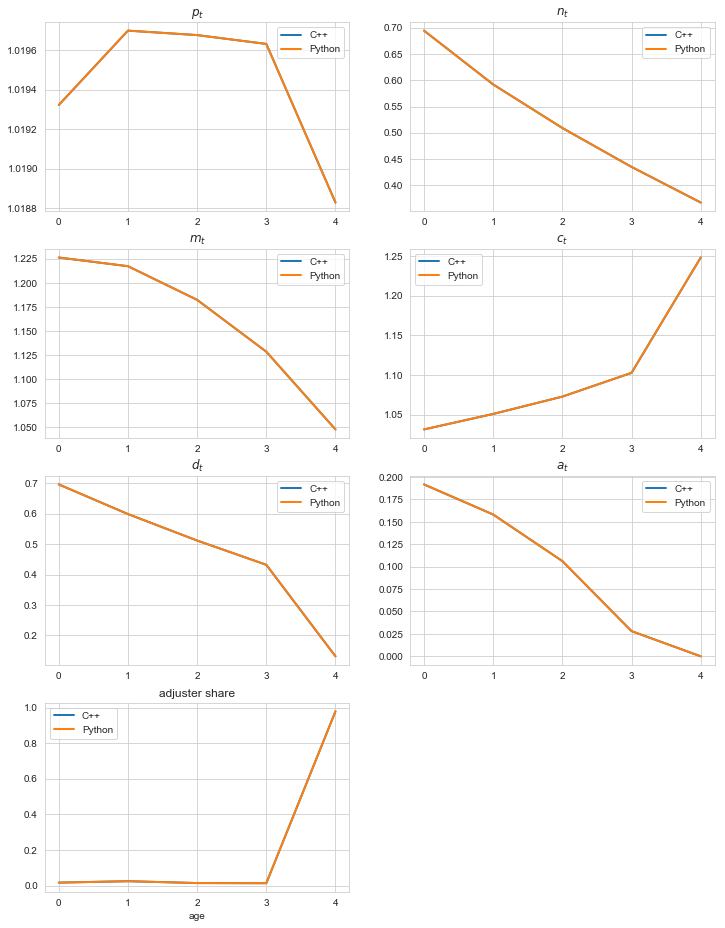

In [6]:
from figs import lifecycle_compare
lifecycle_compare(model_cpp,'C++',model_python,'Python')